## ML Modelling Notebook


In [201]:
import pandas as pd
import numpy as np
import seaborn as sns

In [202]:
# Load all datasets for training, validation and testing
X_train = pd.read_csv('../datasets/cleaned_datasets/Xtrain.csv')
y_train = pd.read_csv('../datasets/cleaned_datasets/ytrain.csv')
X_val = pd.read_csv('../datasets/cleaned_datasets/Xval.csv')
y_val = pd.read_csv('../datasets/cleaned_datasets/yval.csv')
X_test = pd.read_csv('../datasets/cleaned_datasets/Xtest.csv')

In [203]:
# Quick shape check 

print(f'Training Set Shape: X: {X_train.shape}, y: {y_train.shape}')
print(f'Validation Set Shape: X: {X_val.shape}, y: {y_val.shape}')
print(f'Test Set Shape: X: {X_test.shape}')

Training Set Shape: X: (878, 18), y: (878, 1)
Validation Set Shape: X: (220, 18), y: (220, 1)
Test Set Shape: X: (418, 19)


### Removing Family Size and Embark Variables based on Random Forest Feature Importance Results

In [204]:
X_train.columns

Index(['Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'Titles_Miss', 'Titles_Mr', 'Titles_Mrs', 'Family_Size_1',
       'Family_Size_2', 'Family_Size_3', 'Family_Size_4', 'Family_Size_5',
       'Family_Size_6', 'Family_Size_7', 'Family_Size_10'],
      dtype='object')

In [205]:
X_test.columns

Index(['PassengerId', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Titles_Miss', 'Titles_Mr', 'Titles_Mrs',
       'Family_Size_1', 'Family_Size_2', 'Family_Size_3', 'Family_Size_4',
       'Family_Size_5', 'Family_Size_6', 'Family_Size_7', 'Family_Size_10'],
      dtype='object')

In [206]:
# Select columns to input to model, and convert Dataframe to np vectors
# column_ranges = np.r_[0:7, 11:13]

column_ranges = ['Age','Fare','Pclass_2','Pclass_3','Sex_male','Titles_Miss', 'Titles_Mr', 'Titles_Mrs']
# print(f'X_train Cols: {X_train.columns} , \n X_test Cols: {X_test.columns}')

# Convert Pandas Dataframes to Numpy Vectors
# Xtrain = Xtrain.loc[:, column_ranges].values
# ytrain = ytrain.iloc[:,0].values
# Xtest =  Xtest.loc[:, column_ranges].values

# Convert Pandas Dataframes to Numpy Vectors

Xtrain = X_train[column_ranges].values
ytrain = y_train.iloc[:,0].values
Xval = X_val[column_ranges].values
yval = y_val.iloc[:,0].values
Xtest = X_test[column_ranges].values

print(f'Training Set Shape: X: {Xtrain.shape}, y: {ytrain.shape}')
print(f'Validation Set Shape: X: {Xval.shape}, y: {yval.shape}')
print(f'Test Set Shape: X: {Xtest.shape}')


Training Set Shape: X: (878, 8), y: (878,)
Validation Set Shape: X: (220, 8), y: (220,)
Test Set Shape: X: (418, 8)


## Models to implement
1) Logistic Regression
2) Random Forest
3) Ensamble Methods

Goal: Predict if an individual Survived or not to Titanic tragedy based on Features inputs

## Logistic Regresion Model

In [207]:
# Create a DataFrame to save predictions
predictions = pd.DataFrame()

In [208]:
# ML Libraries required
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [209]:
# Model Training
# Define the parameter grid
param_grid = {
    'C': np.logspace(-10, 10, 50),  # Regularization parameter
    'penalty': ['l2','l1'],      # Norm used in the penalization
    'solver': ['liblinear']       # Solver that supports both l1 and l2 penalties
}

lr = LogisticRegression(random_state = 42)
# Set up the GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(Xtrain, ytrain)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Evaluate on the test set with the best found parameters
best_model = grid_search.best_estimator_
val_score = best_model.score(Xval, yval)
print(f"Validation set score: {val_score}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'C': 4.094915062380419, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.7517077922077922
Validation set score: 0.8409090909090909


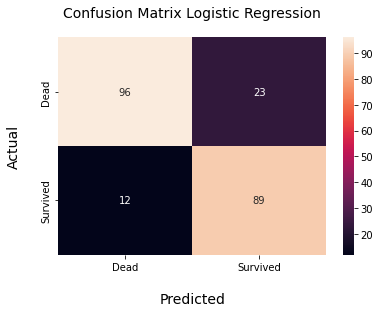

In [210]:
ypred = best_model.predict(Xval)
conf_matrix = confusion_matrix(yval, ypred)

# Visualize Confusion Matrix with Seaborn HeatMap
hm = sns.heatmap(conf_matrix, annot=True, fmt='d')
# set plot title
hm.set_title("Confusion Matrix Logistic Regression", fontsize=14, pad=20)

# set x-axis label and ticks. 
hm.set_xlabel("Predicted", fontsize=14, labelpad=20)
hm.xaxis.set_ticklabels(['Dead', 'Survived'])
 
# set y-axis label and ticks
hm.set_ylabel("Actual", fontsize=14, labelpad=20)
hm.yaxis.set_ticklabels(['Dead', 'Survived']) 

# Predict Xtest
ytest = best_model.predict(Xtest)

In [211]:
# Save ypred in Dataframe
predictions['lr'] = pd.DataFrame(data= ytest, columns=['lr'])

## Random Forest Classifier Model

In [212]:
from sklearn.ensemble import RandomForestClassifier

In [213]:
# Model Training
# Define the parameter grid
param_grid = {    
    'criterion': ['gini','entropy','log_loss'],
    # 'min_samples_split': [5,10],
    # 'min_samples_leaf': [2,4],
    # 'oob_score': [True, False],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state = 42, n_jobs=4)
# Set up the GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(Xtrain, ytrain)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Evaluate on the test set with the best found parameters
best_model = grid_search.best_estimator_
val_score = best_model.score(Xval, yval)
print(f"Validation set score: {val_score}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'bootstrap': True, 'criterion': 'gini'}
Best cross-validation score: 0.8735714285714286
Validation set score: 0.9


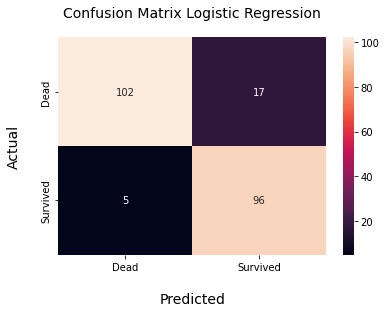

In [214]:
ypred = best_model.predict(Xval)
conf_matrix = confusion_matrix(yval, ypred)

# Visualize Confusion Matrix with Seaborn HeatMap
hm = sns.heatmap(conf_matrix, annot=True, fmt='d')
# set plot title
hm.set_title("Confusion Matrix Logistic Regression", fontsize=14, pad=20)

# set x-axis label and ticks. 
hm.set_xlabel("Predicted", fontsize=14, labelpad=20)
hm.xaxis.set_ticklabels(['Dead', 'Survived'])
 
# set y-axis label and ticks
hm.set_ylabel("Actual", fontsize=14, labelpad=20)
hm.yaxis.set_ticklabels(['Dead', 'Survived']) 

# Predict Xtest
ytest = best_model.predict(Xtest)

In [215]:
# Save ypred in Dataframe
predictions['rf'] = pd.DataFrame(data= ytest, columns=['rf'])

In [216]:
importances = best_model.feature_importances_
features = X_train[column_ranges].columns
# Print the feature importances
# for feature, importance in zip(features, importances):
#     print(f"{feature}: {importance}")

# Optionally, you can sort the features by importance
sorted_indices = np.argsort(importances)[::-1]
for idx in sorted_indices:
    print(f"{features[idx]}: {importances[idx]}")

Fare: 0.389750007267959
Age: 0.29304634403860047
Titles_Mr: 0.10824587240949902
Sex_male: 0.08394149648307528
Pclass_3: 0.059393049115848584
Titles_Miss: 0.028581868748346548
Titles_Mrs: 0.02029967605147613
Pclass_2: 0.01674168588519488


## Ada Boost Classifier

In [217]:
from sklearn.ensemble import AdaBoostClassifier

In [218]:
# Model Training
# Define the parameter grid
param_grid = {    
    'learning_rate': np.logspace(0.1, 1, 50),
    'algorithm': ['SAMME', 'SAMME.R']
}

ab = AdaBoostClassifier(random_state = 42)
# Set up the GridSearchCV
grid_search = GridSearchCV(ab, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(Xtrain, ytrain)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Evaluate on the test set with the best found parameters
best_model = grid_search.best_estimator_
val_score = best_model.score(Xval, yval)
print(f"Validation set score: {val_score}")



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'algorithm': 'SAMME', 'learning_rate': 1.7657888717633194}
Best cross-validation score: 0.8086168831168831
Validation set score: 0.8409090909090909


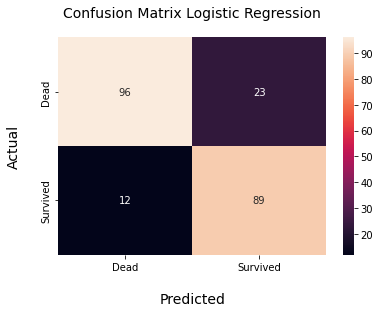

In [219]:
ypred = best_model.predict(Xval)
conf_matrix = confusion_matrix(yval, ypred)

# Visualize Confusion Matrix with Seaborn HeatMap
hm = sns.heatmap(conf_matrix, annot=True, fmt='d')
# set plot title
hm.set_title("Confusion Matrix Logistic Regression", fontsize=14, pad=20)

# set x-axis label and ticks. 
hm.set_xlabel("Predicted", fontsize=14, labelpad=20)
hm.xaxis.set_ticklabels(['Dead', 'Survived'])
 
# set y-axis label and ticks
hm.set_ylabel("Actual", fontsize=14, labelpad=20)
hm.yaxis.set_ticklabels(['Dead', 'Survived']) 

# Predict Xtest
ytest = best_model.predict(Xtest)

In [220]:
# Save ypred in Dataframe
predictions['ada'] = pd.DataFrame(data= ytest, columns=['ada'])

In [221]:
predictions = pd.concat([X_test['PassengerId'], predictions], axis=1)
predictions.head()

,PassengerId,lr,rf,ada
0,892,0,0,0
1,893,1,0,1
2,894,0,1,0
3,895,0,0,0
4,896,1,1,1


In [222]:
# Create Submission Files for Kaggle Website
predictions[['PassengerId','lr']].rename(columns={'lr': 'Survived'}).to_csv('../datasets/predictions/lr.csv', index= False)
predictions[['PassengerId','rf']].rename(columns={'rf': 'Survived'}).to_csv('../datasets/predictions/rf.csv', index= False)
predictions[['PassengerId','ada']].rename(columns={'ada': 'Survived'}).to_csv('../datasets/predictions/ada.csv', index= False)